![example](images/Yellow_Popcorn.png)

# Movie Industry Exploratory Data Analysis

**Author:** Hazal Aydin
***

## Overview

I have been tasked with assisting Microsoft in their new movie studio initative. My goal was to explore what type of movies are currently doing the best at the box office and provide actionable insights based on this exploratory study. My analysis of the movie industry consisted of exploring IMDB and Box Office Mojo (BOM) data and utilising descriptive statistics and visualizations. The time period of the analysis was from 2010 to 2018. The results of the analysis showed that the Sci-Fi genre has the highest potential of the box office success. On the other hand, its distribution of total gross also suggests that the movies' success vary and there are risks involved. The other genres with high success potential are Animation and Adventure. The data also shows the movies that have a runtime between 125 minutes and 180 minutes are highly likely to succeed. Finally, there was no significant correlation between the average IMDB rating and the total gross. However, the results showed that the movies obtained a rating 8 and above had higher mean of total gross. Microsoft can use this report to brief wider exploratory studies and making decisions on the genres and movie lengths.

## Business Problem

Microsoft sees an opportunity to branch out to the multi-billion dollar movie-making industry. They decided to open a Microsoft Movie Studio but the challenge is they don't have the know-how in the industry. To assist them with this initiative, I explored what type of movies bring the highest worldwide gross.

I picked three variables to explore:

* Genre: Which genres have a higher chance of success? I picked this variable to explore because it can give a general direction of where this initiative is going.
* Movie Length: There is a trend of making longer movies in Holywood. I wanted to see if the longer movies have higher box office success - and if there is a limit to the movie length.
* Average Rating: The main question I explored if there is a correlation between the IMDB ratings and the worldwide total gross.

## Data Understanding

I used three datasets from two different data sources.

***
* IMDB Title Basics: It comes from the IMDB website where the information of the movies is stored.
* IMDB Title Ratings: It comes from the IMDB website as well but it includes the average ratings that are derived from votes submitted by IMDb users, not movie critics.
* Box Office Mojo (BOM) Movie Gross: It contains the domestic and foreign gross figures.

## Setting Up The Study

In [1]:
# Importing standard packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Importing the whitegrid theme because I'll use the same theme across the visuals sns.set_theme(style="whitegrid")
sns.set_theme(style="whitegrid")

In [2]:
# Setting pandas display to avoid scientific notation in my dataframes.
# Aiming to have a notebook that reads well.
# Note that, I woulnd't use the same formatting across all data analysis tasks. I belive it's relevant for this study.
pd.options.display.float_format = '{:.2f}'.format

In [3]:
# Now, I want to check if the code above works with an example.
df_examples = pd.DataFrame([123.456789, 234.567812, 345.6789579, 456.789084],
                  index = ['a','b','c','d'],
                  columns = ['random numbers'])
print (df_examples)

   random numbers
a          123.46
b          234.57
c          345.68
d          456.79


The formatting is working as intended.

## Data Preparation

In [4]:
# Importing the IMDB title basics file
df_title_basics = pd.read_csv('zippedData/imdb.title.basics.csv.gz')
df_title_basics.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.00,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.00,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.00,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.00,"Comedy,Drama,Fantasy"


The IMDB title basics table contains the movie titles, release year, run time in minutes, genres, and a tracking ID called "tconst".

In [5]:
#Now, let's have a closer look at the Dataframe.
df_title_basics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [6]:
# Immediately, we can see that there are NULL values in the original title, run time, and genre series.
# We will need to address the null values later on.
# We can also see the data types and it looks like we don't need to make any changes at this point.
# Now, I want to see how many different genres the dataset contains.
df_title_basics['genres'].value_counts()

Documentary                   32185
Drama                         21486
Comedy                         9177
Horror                         4372
Comedy,Drama                   3519
                              ...  
Adventure,Music,Mystery           1
Documentary,Horror,Romance        1
Sport,Thriller                    1
Comedy,Sport,Western              1
Adventure,History,War             1
Name: genres, Length: 1085, dtype: int64

In [7]:
# There are 1085 unique genre types.
# Now, let's check how far the release date goes back.
df_title_basics['start_year'].value_counts()

2017    17504
2016    17272
2018    16849
2015    16243
2014    15589
2013    14709
2012    13787
2011    12900
2010    11849
2019     8379
2020      937
2021       83
2022       32
2023        5
2024        2
2026        1
2025        1
2115        1
2027        1
Name: start_year, dtype: int64

In [8]:
# The data goes back to 2010. They can be called somewhat recent movies and the insights from them would be relevant.
# We also see a few movies with release dates after 2022. They haven't been released yet.
# Let's check the data that has the start year of 2023 and beyond.
df_title_basics.loc[df_title_basics['start_year'] >= 2023]

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
2483,tt10255736,Untitled Marvel Project,Untitled Marvel Project,2023,NaN,Action
2906,tt10298848,Untitled Disney Live-Action Project,Untitled Disney Live-Action Project,2023,NaN,NaN
2948,tt10300396,Untitled Star Wars Film,Untitled Star Wars Film,2024,NaN,NaN
2949,tt10300398,Untitled Star Wars Film,Untitled Star Wars Film,2026,NaN,Fantasy
16337,tt1757678,Avatar 3,Avatar 3,2023,NaN,"Action,Adventure,Drama"
52213,tt3095356,Avatar 4,Avatar 4,2025,NaN,"Action,Adventure,Fantasy"
89506,tt5174640,100 Years,100 Years,2115,NaN,Drama
96592,tt5637536,Avatar 5,Avatar 5,2027,NaN,"Action,Adventure,Fantasy"
105187,tt6149054,Fantastic Beasts and Where to Find Them 5,Fantastic Beasts and Where to Find Them 5,2024,NaN,"Adventure,Family,Fantasy"
106865,tt6258542,Wraith of the Umbra and Eidolon II,Wraith of the Umbra and Eidolon II,2023,NaN,"Adventure,Drama,Fantasy"


In [9]:
# I will remove these movies from the dataset since I don't know how they will perform once they are released.
df_title_basics = df_title_basics.loc[df_title_basics['start_year'] <= 2022]
df_title_basics.loc[df_title_basics['start_year'] >= 2023]

,tconst,primary_title,original_title,start_year,runtime_minutes,genres


In [10]:
# Moving to my second file 
# Importing the IMDB title ratings file
df_title_ratings = pd.read_csv('zippedData/imdb.title.ratings.csv.gz')
df_title_ratings.head()

,tconst,averagerating,numvotes
0,tt10356526,8.30,31
1,tt10384606,8.90,559
2,tt1042974,6.40,20
3,tt1043726,4.20,50352
4,tt1060240,6.50,21


The IMDB title ratings file contains the same "tconst" ID as the previous dataset because they are both from IMDB.
This dataset also contains average ratings (avg. ratings) for each movie and the number of votes.
We can easily merge title basics and title rating datasets, using the "tconst" as the key.
Finally, we could calculate the total rating value by multiplying "averagerating" and "numvotes".
However, we won't need the total rating value in this study.

In [11]:
# Let's have a closer look at the new DataFrame.
df_title_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tconst         73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


The number of entries in the title basics and the title ratings don't match.
It means that when we merge the datasets, not all the movies in the title basics will have an average rating.

In [12]:
# Importing the BOM movie gross file
df_movie_gross = pd.read_csv('zippedData/bom.movie_gross.csv.gz')
df_movie_gross.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.00,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.00,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.00,664300000,2010
3,Inception,WB,292600000.00,535700000,2010
4,Shrek Forever After,P/DW,238700000.00,513900000,2010


The BOM Movie Gross includes movie titles, studios, release year, and domestic and foreign gross values.

In [13]:
# Exploring the new DataFrame
df_movie_gross.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [14]:
# There are fewer entries in this DataFrame compared to the previous two. It'll cause NULL values when we merge them.
# There are a few NULL values in the studio column.
# There are NULL values in the foreign gross.
# I can also see the foreign gross data type is a string.
# Let's convert foreign gross data type into float.
df_movie_gross['foreign_gross'] = df_movie_gross['foreign_gross'].astype("str")
df_movie_gross['foreign_gross'] = df_movie_gross['foreign_gross'].map(lambda x: x.replace(",",""))
df_movie_gross['foreign_gross'] = df_movie_gross['foreign_gross'].astype("float64")
df_movie_gross['foreign_gross'].head()

0   652000000.00
1   691300000.00
2   664300000.00
3   535700000.00
4   513900000.00
Name: foreign_gross, dtype: float64

In [15]:
# Finally, I'm curious about how far the year data goes.
df_movie_gross['year'].value_counts()

2015    450
2016    436
2012    400
2011    399
2014    395
2013    350
2010    328
2017    321
2018    308
Name: year, dtype: int64

The BOM Movie Gross includes data between 2010 and 2018 years. It means we won't be able to check the gross data for the movies released after 2018.
Now, our DataFrames are ready for a merge.

### Merging The DataFrames

In [16]:
# I will start merging the title basics and the movie gross DataFrames.
# Both DataFrames have "titles" which will be my key.
# Before merging them, I want to check if the primary_title in the title basics and the title in the movie gross match.
# Let's check Alice In Wonderland as an example.
df_movie_gross.query('title.str.contains("Alice")')

,title,studio,domestic_gross,foreign_gross,year
1,Alice in Wonderland (2010),BV,334200000.00,691300000.00,2010
248,The Disappearance of Alice Creed,Anch.,167000.00,701000.00,2010
1983,Still Alice,SPC,18800000.00,25100000.00,2015
2310,Fidelio: Alice's Odyssey,FRun,3600.00,NaN,2015
2352,Alice Through the Looking Glass,BV,77000000.00,222400000.00,2016


In [17]:
df_title_basics.query('primary_title.str.contains("Alice in Wonderland")')

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
1608,tt1014759,Alice in Wonderland,Alice in Wonderland,2010,108.00,"Adventure,Family,Fantasy"
20954,tt1867079,The Initiation of Alice in Wonderland: The Loo...,The Initiation of Alice in Wonderland: The Loo...,2010,75.00,Documentary
22538,tt1926979,Alice in Wonderland,Alice in Wonderland,2011,48.00,Documentary
26279,tt2049386,Alice in Wonderland,Alice in Wonderland,2010,99.00,"Fantasy,Musical"


"Alice In Wonderland" in BOM Movie Gross DataFrame can potentially match with multiple movies in the IMDB Title Basics DataFrame. We will use the "year" as a second key to making a better match.

In [18]:
# I also realised a formatting difference in the titles.
# Now, I will remove paranthesis from the titles.
df_movie_gross['title'] = df_movie_gross['title'].str.split('(').str[0]
df_movie_gross.query('title.str.contains("Alice")')

,title,studio,domestic_gross,foreign_gross,year
1,Alice in Wonderland,BV,334200000.00,691300000.00,2010
248,The Disappearance of Alice Creed,Anch.,167000.00,701000.00,2010
1983,Still Alice,SPC,18800000.00,25100000.00,2015
2310,Fidelio: Alice's Odyssey,FRun,3600.00,NaN,2015
2352,Alice Through the Looking Glass,BV,77000000.00,222400000.00,2016


In [19]:
# Now, I'm formating titles in both DataFrames.
df_movie_gross['title'] = df_movie_gross['title'].str.title()
df_movie_gross.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.00,652000000.00,2010
1,Alice In Wonderland,BV,334200000.00,691300000.00,2010
2,Harry Potter And The Deathly Hallows Part 1,WB,296000000.00,664300000.00,2010
3,Inception,WB,292600000.00,535700000.00,2010
4,Shrek Forever After,P/DW,238700000.00,513900000.00,2010


In [20]:
df_title_basics['primary_title'] = df_title_basics['primary_title'].str.title()
df_title_basics.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.00,"Action,Crime,Drama"
1,tt0066787,One Day Before The Rainy Season,Ashad Ka Ek Din,2019,114.00,"Biography,Drama"
2,tt0069049,The Other Side Of The Wind,The Other Side of the Wind,2018,122.00,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.00,"Comedy,Drama,Fantasy"


In [21]:
# Rename the columns in the IMDB title basics DataFrame.
df_title_basics.rename(columns = {'primary_title' : 'title','start_year' : 'release_year'}, inplace=True)
df_title_basics.columns

Index(['tconst', 'title', 'original_title', 'release_year', 'runtime_minutes',
       'genres'],
      dtype='object')

In [22]:
#Let's rename the columns in the BOM movie gross DataFrame as well.
df_movie_gross.rename(columns = {'year' : 'release_year'}, inplace=True)
df_movie_gross.columns

Index(['title', 'studio', 'domestic_gross', 'foreign_gross', 'release_year'], dtype='object')

In [23]:
# Finally, I want to rename the average rating in the IMDB title ratings DataFrame.
df_title_ratings.rename(columns = {'averagerating' : 'average_rating'}, inplace=True)
df_title_ratings.columns

Index(['tconst', 'average_rating', 'numvotes'], dtype='object')

In [24]:
# Merging the IMDB title basics and the BOM movie gross
# Because I'm using domestic and foreign gross figures as my main metric, I'm doing a right join.
df_merged = pd.merge(df_title_basics, df_movie_gross, how='right', left_on=['title','release_year'], right_on = ['title','release_year'])
df_merged.head()

,tconst,title,original_title,release_year,runtime_minutes,genres,studio,domestic_gross,foreign_gross
0,tt0435761,Toy Story 3,Toy Story 3,2010,103.00,"Adventure,Animation,Comedy",BV,415000000.00,652000000.00
1,NaN,Alice In Wonderland,NaN,2010,NaN,NaN,BV,334200000.00,691300000.00
2,NaN,Harry Potter And The Deathly Hallows Part 1,NaN,2010,NaN,NaN,WB,296000000.00,664300000.00
3,tt1375666,Inception,Inception,2010,148.00,"Action,Adventure,Sci-Fi",WB,292600000.00,535700000.00
4,tt0892791,Shrek Forever After,Shrek Forever After,2010,93.00,"Adventure,Animation,Comedy",P/DW,238700000.00,513900000.00


In [25]:
# Merging the merged DataFrame and the IMDB title ratings
# I'm doing a right join again.
df_master = pd.merge(df_title_ratings, df_merged, how='right', left_on=['tconst'], right_on = ['tconst'])
df_master.head()

,tconst,average_rating,numvotes,title,original_title,release_year,runtime_minutes,genres,studio,domestic_gross,foreign_gross
0,tt0435761,8.30,682218.00,Toy Story 3,Toy Story 3,2010,103.00,"Adventure,Animation,Comedy",BV,415000000.00,652000000.00
1,NaN,NaN,NaN,Alice In Wonderland,NaN,2010,NaN,NaN,BV,334200000.00,691300000.00
2,NaN,NaN,NaN,Harry Potter And The Deathly Hallows Part 1,NaN,2010,NaN,NaN,WB,296000000.00,664300000.00
3,tt1375666,8.80,1841066.00,Inception,Inception,2010,148.00,"Action,Adventure,Sci-Fi",WB,292600000.00,535700000.00
4,tt0892791,6.30,167532.00,Shrek Forever After,Shrek Forever After,2010,93.00,"Adventure,Animation,Comedy",P/DW,238700000.00,513900000.00


### Cleaning The Master DataFrame

In [26]:
# Let's explore and clean our master DataFrame
df_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3428 entries, 0 to 3427
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tconst           1944 non-null   object 
 1   average_rating   1918 non-null   float64
 2   numvotes         1918 non-null   float64
 3   title            3428 non-null   object 
 4   original_title   1944 non-null   object 
 5   release_year     3428 non-null   int64  
 6   runtime_minutes  1934 non-null   float64
 7   genres           1942 non-null   object 
 8   studio           3423 non-null   object 
 9   domestic_gross   3400 non-null   float64
 10  foreign_gross    2061 non-null   float64
dtypes: float64(5), int64(1), object(5)
memory usage: 321.4+ KB


In [27]:
# I will start dropping the columns that have no use for this study.
# By dropping them, I'm aiming to have a DataFrame that is easier to read and work with.
df_master = df_master.drop(['tconst','numvotes','original_title'], axis=1)
df_master.columns

Index(['average_rating', 'title', 'release_year', 'runtime_minutes', 'genres',
       'studio', 'domestic_gross', 'foreign_gross'],
      dtype='object')

In [28]:
# The null values in the domestic column could be coming from the international movies.
# The movies with null foreign values probably didn't realesed anywhere but the US.
# I will replace any NULL values in both domestic and foreign gross with 0.
df_master['domestic_gross'] = df_master['domestic_gross'].fillna(0)
df_master['foreign_gross'] = df_master['foreign_gross'].fillna(0)
df_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3428 entries, 0 to 3427
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   average_rating   1918 non-null   float64
 1   title            3428 non-null   object 
 2   release_year     3428 non-null   int64  
 3   runtime_minutes  1934 non-null   float64
 4   genres           1942 non-null   object 
 5   studio           3423 non-null   object 
 6   domestic_gross   3428 non-null   float64
 7   foreign_gross    3428 non-null   float64
dtypes: float64(4), int64(1), object(3)
memory usage: 241.0+ KB


In [29]:
# Defining a new series called "total_gross"
df_master['total_gross'] = df_master['domestic_gross'] + df_master['foreign_gross']
df_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3428 entries, 0 to 3427
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   average_rating   1918 non-null   float64
 1   title            3428 non-null   object 
 2   release_year     3428 non-null   int64  
 3   runtime_minutes  1934 non-null   float64
 4   genres           1942 non-null   object 
 5   studio           3423 non-null   object 
 6   domestic_gross   3428 non-null   float64
 7   foreign_gross    3428 non-null   float64
 8   total_gross      3428 non-null   float64
dtypes: float64(5), int64(1), object(3)
memory usage: 267.8+ KB


In [30]:
# Checking if we have any "0" value total gross rows.
df_master.loc[df_master['total_gross']==0]

,average_rating,title,release_year,runtime_minutes,genres,studio,domestic_gross,foreign_gross,total_gross


There are no movies with "0" total gross value. It means that we are not dealing with any missing data in this series.

In [31]:
# I'm adding a new total gross column in millions because I want to have a plot-friendly version of the values.df_master['total_gross'] = df_master['total_gross'].astype("float")
df_master['total_gross_mil'] = df_master ['total_gross'] / 1000000
df_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3428 entries, 0 to 3427
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   average_rating   1918 non-null   float64
 1   title            3428 non-null   object 
 2   release_year     3428 non-null   int64  
 3   runtime_minutes  1934 non-null   float64
 4   genres           1942 non-null   object 
 5   studio           3423 non-null   object 
 6   domestic_gross   3428 non-null   float64
 7   foreign_gross    3428 non-null   float64
 8   total_gross      3428 non-null   float64
 9   total_gross_mil  3428 non-null   float64
dtypes: float64(6), int64(1), object(3)
memory usage: 294.6+ KB


In [32]:
# Finally, I want to format the domestic, foreign, and total gross values.
df_master['total_gross'] = df_master['total_gross'].astype("int")
df_master['domestic_gross'] = df_master['domestic_gross'].astype("int")
df_master['foreign_gross'] = df_master['foreign_gross'].astype("int")

df_master['total_gross'] = df_master['total_gross'].map('${:,.0f}'.format)
df_master['domestic_gross'] = df_master['domestic_gross'].map('${:,.0f}'.format)
df_master['foreign_gross'] = df_master['foreign_gross'].map('${:,.0f}'.format)
df_master.head()

,average_rating,title,release_year,runtime_minutes,genres,studio,domestic_gross,foreign_gross,total_gross,total_gross_mil
0,8.30,Toy Story 3,2010,103.00,"Adventure,Animation,Comedy",BV,"$415,000,000","$652,000,000","$1,067,000,000",1067.00
1,NaN,Alice In Wonderland,2010,NaN,NaN,BV,"$334,200,000","$691,300,000","$1,025,500,000",1025.50
2,NaN,Harry Potter And The Deathly Hallows Part 1,2010,NaN,NaN,WB,"$296,000,000","$664,300,000","$960,300,000",960.30
3,8.80,Inception,2010,148.00,"Action,Adventure,Sci-Fi",WB,"$292,600,000","$535,700,000","$828,300,000",828.30
4,6.30,Shrek Forever After,2010,93.00,"Adventure,Animation,Comedy",P/DW,"$238,700,000","$513,900,000","$752,600,000",752.60


In [33]:
# Checking for duplicates
df_master.duplicated().value_counts()

False    3428
dtype: int64

No duplicates are found.

In [34]:
# Changing the order of the columns for a better readability.
df_master = df_master [['title','release_year','average_rating','runtime_minutes','genres','studio','total_gross_mil','domestic_gross','foreign_gross','total_gross']]
df_master.head()

,title,release_year,average_rating,runtime_minutes,genres,studio,total_gross_mil,domestic_gross,foreign_gross,total_gross
0,Toy Story 3,2010,8.30,103.00,"Adventure,Animation,Comedy",BV,1067.00,"$415,000,000","$652,000,000","$1,067,000,000"
1,Alice In Wonderland,2010,NaN,NaN,NaN,BV,1025.50,"$334,200,000","$691,300,000","$1,025,500,000"
2,Harry Potter And The Deathly Hallows Part 1,2010,NaN,NaN,NaN,WB,960.30,"$296,000,000","$664,300,000","$960,300,000"
3,Inception,2010,8.80,148.00,"Action,Adventure,Sci-Fi",WB,828.30,"$292,600,000","$535,700,000","$828,300,000"
4,Shrek Forever After,2010,6.30,93.00,"Adventure,Animation,Comedy",P/DW,752.60,"$238,700,000","$513,900,000","$752,600,000"


In [35]:
# Saving copy of DataFrame as csv file
df_master.to_csv('./df_master.csv')

## Data Modeling
Describe and justify the process for analyzing or modeling the data.

***
Questions to consider:
* How did you analyze or model the data?
* How did you iterate on your initial approach to make it better?
* Why are these choices appropriate given the data and the business problem?
***

### Genres

In [36]:
# I started to define new DataFrames for each variable I want to explore.
# I'm starting with genres.
# I'm crating a new DataFrame by copying. In that way, I'm avoiding making permanent changes in the master DataFrame.
# Then, I'm dropping the rows that don't have any genres.
df_genres = df_master.copy()
df_genres['genres'] = df_genres['genres'].fillna('Missing')
df_genres = df_genres.loc[df_genres['genres'] != 'Missing']
df_genres.query('genres.str.contains("Missing")')

,title,release_year,average_rating,runtime_minutes,genres,studio,total_gross_mil,domestic_gross,foreign_gross,total_gross


In [37]:
# Let's check the DataFrame
df_genres.shape

(1942, 10)

In [38]:
# I'll split the genres into their own rows where there are multiple genres for an individual movie.
# First, I need to convert genres data type into a list.
df_genres['genres'] = df_genres['genres'].str.split(',').tolist()
df_genres['genres']

0       [Adventure, Animation, Comedy]
3          [Action, Adventure, Sci-Fi]
4       [Adventure, Animation, Comedy]
5          [Adventure, Drama, Fantasy]
6          [Action, Adventure, Sci-Fi]
                     ...              
3404                   [Comedy, Drama]
3409                        [Thriller]
3411                           [Drama]
3423         [Action, Drama, Thriller]
3427                          [Comedy]
Name: genres, Length: 1942, dtype: object

In [39]:
# Then, I'm splitting the rows.
# Finally, I'm turning the type from list to string again.
df_genres = df_genres.explode('genres')
df_genres['genres'] = df_genres['genres'].astype('str')
df_genres.shape

(4773, 10)

As we can see, the number of entries have increased from 1942 to 4773.

In [40]:
#I want to see the number of movies per genre.
df_genres['genres'].value_counts().to_frame()

,genres
Drama,999
Comedy,686
Action,542
Adventure,374
Romance,311
Thriller,295
Crime,277
Biography,198
Horror,155
Mystery,137


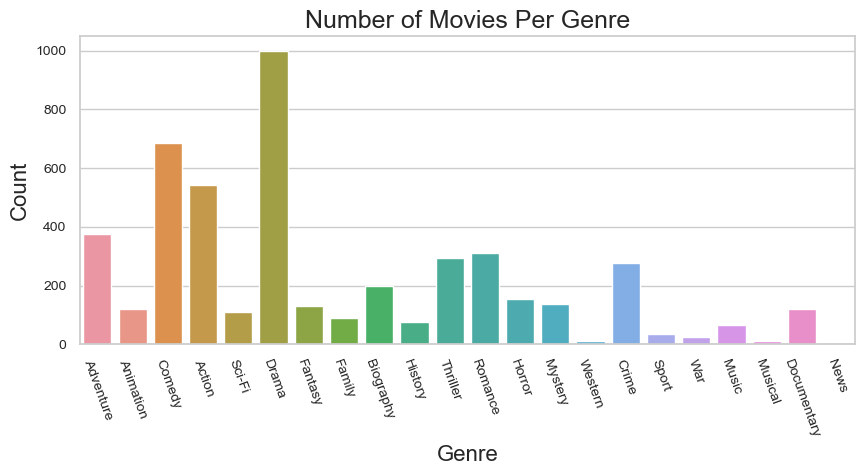

In [41]:
# Let's visualise the output above.
# I'm using Seaborn Countplot to show the number of observations we have for each genre.
plt.figure(figsize=(10,4))
sns.countplot(x=df_genres['genres'])
plt.title('Number of Movies Per Genre', fontsize=18)
plt.ylabel('Count', fontsize=16)
plt.xlabel('Genre', fontsize=16)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xticks(rotation=-70);

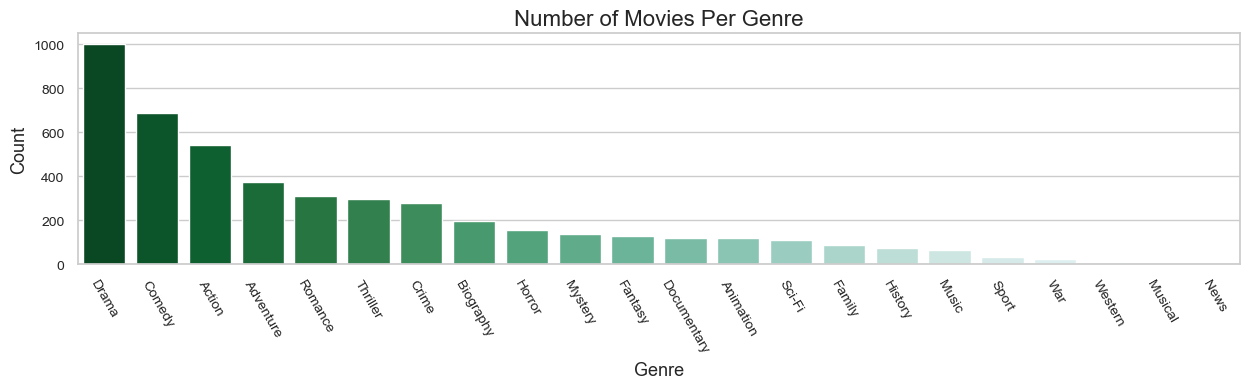

In [42]:
# I realised the order of the genres is alphabetical.
# I want to change the order from the highest count to the lowest.
# Finally, I want to set another pallete that shows the highest count with the darkest color shade.
plt.figure(figsize=(15,3))
sns.countplot(
    x=df_genres['genres'],
    order = df_genres['genres'].value_counts().index,
    palette = 'BuGn_r')
plt.title('Number of Movies Per Genre', fontsize=16)
plt.ylabel('Count', fontsize=13)
plt.xlabel('Genre', fontsize=13)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xticks(rotation=-60);

The Drama genre was most common in this dataset, followed by Comedy and Action. On the other hand, News, Musical, and Western were the least common.

To understand which genres are doing the best at the box office, we need to see the average total gross of each genre and how the total gross spreads out. For this analysis, I will use boxplots.

For my visualisations, I will show my plots with both with and without outliers. The outliers will give me an overall picture of the data and without outliers, I can see the trends more closely.

Distribution of the data in terms of summary statistics.

In [43]:
# Getting mean and median of the total gross by genre.
genre_stats = df_genres.groupby('genres')['total_gross_mil'].agg(['median', 'mean'])
genre_stats.sort_values(by='mean', ascending=False)

,median,mean
genres,,
Sci-Fi,240.90,337.23
Animation,239.30,319.33
Adventure,198.80,313.94
Fantasy,87.10,204.60
Action,69.45,188.42
Family,79.30,154.74
Comedy,35.16,106.46
Thriller,37.30,103.97
Western,10.20,90.59


In [44]:
# Getting Q1 (25th percentile) for total gross of each genre
a = df_genres.groupby('genres')['total_gross_mil'].quantile(0.25)
# Getting Q3 (75th percentile) for total gross of each genre
b = df_genres.groupby('genres')['total_gross_mil'].quantile(0.75)
# Getting interquartile range (IQR) for total gross of each genre
iqr = b - a
iqr.sort_values(ascending=False).to_frame()

,total_gross_mil
genres,
Sci-Fi,507.00
Animation,463.05
Adventure,434.10
Action,240.65
Fantasy,222.95
Family,180.68
Thriller,127.05
Western,126.49
Comedy,117.75


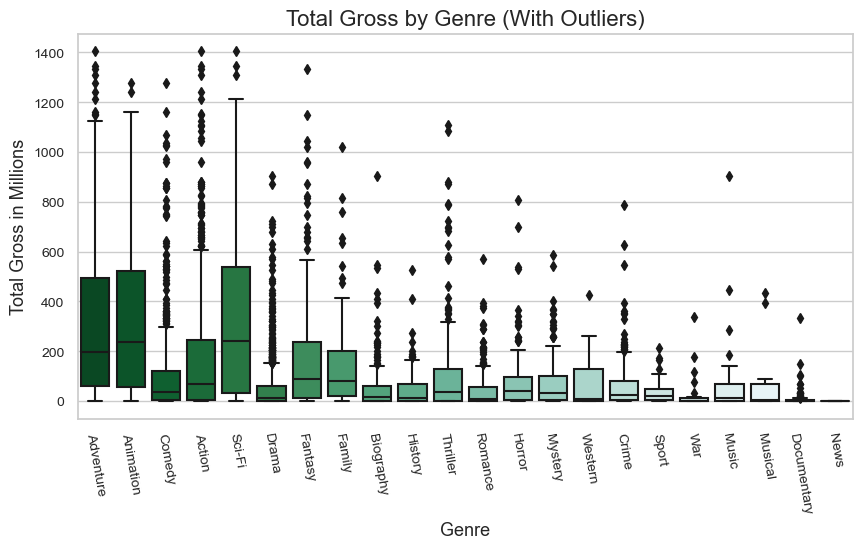

In [45]:
# Generating box plot of total gross statistics per genre with outliers

plt.figure(figsize=(10,5))
sns.boxplot(x='genres', y='total_gross_mil', data=df_genres, palette='BuGn_r')
plt.xticks(rotation=-80)
plt.ylabel('Total Gross in Millions', fontsize=13)
plt.xlabel('Genre', fontsize = 13)
plt.title('Total Gross by Genre (With Outliers)', fontsize = 16)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10);

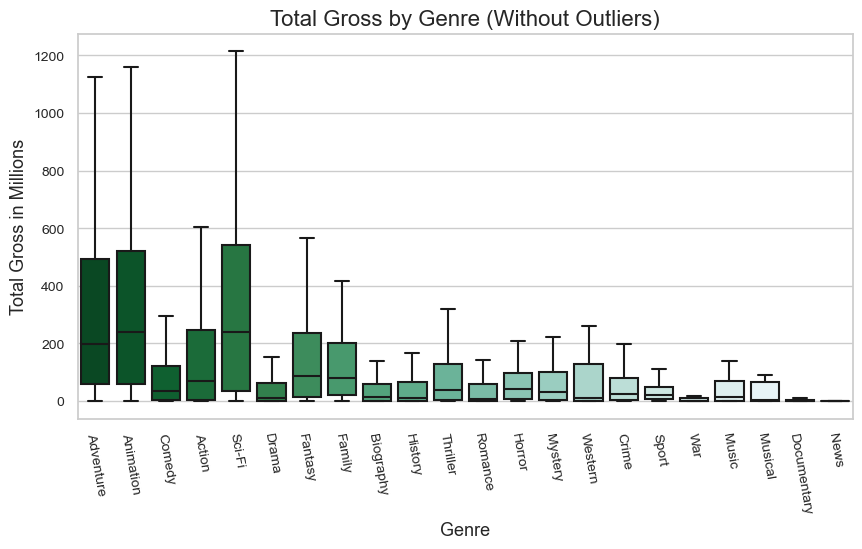

In [46]:
# Generating box plot of total gross statistics per genre without outliers

plt.figure(figsize=(10,5))
sns.boxplot(x='genres', y='total_gross_mil', data=df_genres, showfliers=False, palette='BuGn_r')
plt.xticks(rotation=-80)
plt.ylabel('Total Gross in Millions', fontsize=13)
plt.xlabel('Genre', fontsize = 13)
plt.title('Total Gross by Genre (Without Outliers)', fontsize = 16)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10);

Based on mean and median, Sci-Fi appears to have the highest total gross for the time period I explored. 
It indicates the Sci-Fi genre has a higher potential for box office successs. 
On the other hand, Sc-Fi has the largest interquartile range (IQR), meaning that the middle values of the total gross
is the most spread out. The large IQR suggests that the Sci-Fi movies can produce a wide range of total gross values.
Finally, Sci-Fi doesn't have many outliers which makes the success predictions somewhat more reliable.

After Sci-Fi, Animation and Adventure were the highest-grossing categories based on mean and median.
These categories have high IQRs as well, with a large variance in total gross values. 

After looking at the IQRs, it is clear that the total gross values can spread out widely and the success depends more
than one variable. The other factors effecting each genres' total gross need to be explored more in depth.

### Runtime

In [47]:
# The second variable I'm exploring is the runtime.
# I will start creating a copy of master DataFrame for this use.
df_runtime = df_master.copy()
df_runtime.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3428 entries, 0 to 3427
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   title            3428 non-null   object 
 1   release_year     3428 non-null   int64  
 2   average_rating   1918 non-null   float64
 3   runtime_minutes  1934 non-null   float64
 4   genres           1942 non-null   object 
 5   studio           3423 non-null   object 
 6   total_gross_mil  3428 non-null   float64
 7   domestic_gross   3428 non-null   object 
 8   foreign_gross    3428 non-null   object 
 9   total_gross      3428 non-null   object 
dtypes: float64(3), int64(1), object(6)
memory usage: 294.6+ KB


In [48]:
# 43.35% of the entries have null values for the runtime.
df_runtime = df_runtime.dropna(axis=0, subset=['runtime_minutes'])

In [49]:
# Let's check the DataFrame again.
df_runtime.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1934 entries, 0 to 3427
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   title            1934 non-null   object 
 1   release_year     1934 non-null   int64  
 2   average_rating   1914 non-null   float64
 3   runtime_minutes  1934 non-null   float64
 4   genres           1933 non-null   object 
 5   studio           1932 non-null   object 
 6   total_gross_mil  1934 non-null   float64
 7   domestic_gross   1934 non-null   object 
 8   foreign_gross    1934 non-null   object 
 9   total_gross      1934 non-null   object 
dtypes: float64(3), int64(1), object(6)
memory usage: 166.2+ KB


In [50]:
# Now, I want to see the statistical summary of the runtimes.
df_runtime['runtime_minutes'].describe()

count   1934.00
mean     110.23
std       20.39
min        5.00
25%       96.00
50%      107.00
75%      122.00
max      189.00
Name: runtime_minutes, dtype: float64

As we can see, the runtimes vary between 5 minutes and 189 minutes. The mean is 110 minutes, which is just under 2 hours. To better understand the runtime variable, I'm going to categorise them based on their length.

According to The Academy of Motion Picture Arts and Sciences, movies under 40 minutes are considered to be short films. Any movie with a runtime of 41 and above is considered a feature-length film. For box office success, we need to analyse feature-length films. That's why I could remove them from my analysis but for now, I'll leave them in just out of curiosity.

We also know 90 minutes movies used to be considered the industry standard for a feature-length film. However, previous studies that ran by external parties showed another trend. The top 10 movies of the summer of 2009 had an average running time of 116 minutes. In the summer of 2019, that stat increased to 125 minutes. We also have some big box office hits that passed the 125-minute mark in recent years. For example, 'Avengers: Endgame' had a runtime of 182 minutes, and 'Once Upon a Time in Hollywood' pushed past the 160-minute mark.

Based on all the background information above, I'm going to categorise the runtimes as below:
* Anything below 41 min is a short film
* Anything between 41 min and 100 min is a short format feature-film
* Anything between 101 min and 125 min is a medium format feature-film
* Anything between 125 min and 180 min is a long format feature-film
* Anything above 180 min is a super sized feature-film

In [51]:
# Defining a new function to assign the movie length categories

def movie_length(x):
    if x < 41:
        return 'Short Film'
    elif x > 40 and x < 101:
        return 'Short Format Feature-Film'
    elif x > 100 and x  < 126:
        return 'Medium Format Feature-Film'
    elif x > 125 and x < 181:
        return 'Long Format Feature-Film'
    else:
        return 'Super-Sized Feature-Film'

In [52]:
# Definning a new series using the movie_length() function
df_runtime['movie_length'] = df_runtime['runtime_minutes'].apply(movie_length)
df_runtime['movie_length'].value_counts().to_frame()

,movie_length
Medium Format Feature-Film,862
Short Format Feature-Film,661
Long Format Feature-Film,401
Short Film,7
Super-Sized Feature-Film,3


In [53]:
# The majority of the movies fall into the "medium format" followed by the "short format"
# Getting mean and median of the total gross by movie length.
genre_stats_2 = df_runtime.groupby('movie_length')['total_gross_mil'].agg(['median', 'mean'])
genre_stats_2.sort_values(by='mean', ascending=False)

,median,mean
movie_length,,
Long Format Feature-Film,25.70,173.52
Medium Format Feature-Film,35.75,98.87
Short Format Feature-Film,15.68,76.64
Short Film,4.50,13.24
Super-Sized Feature-Film,1.60,10.23


In [54]:
# Getting Q1 (25th percentile) for total gross of each movie length
c = df_runtime.groupby('movie_length')['total_gross_mil'].quantile(0.25)
# Getting Q3 (75th percentile) for total gross of each movie length
d = df_runtime.groupby('movie_length')['total_gross_mil'].quantile(0.75)
# Getting interquartile range (IQR) for total gross of each movie length
iqr_2 = d - c
iqr_2.sort_values(ascending=False)

movie_length
Long Format Feature-Film     204.42
Medium Format Feature-Film   116.88
Short Format Feature-Film     78.09
Super-Sized Feature-Film      13.25
Short Film                     9.40
Name: total_gross_mil, dtype: float64

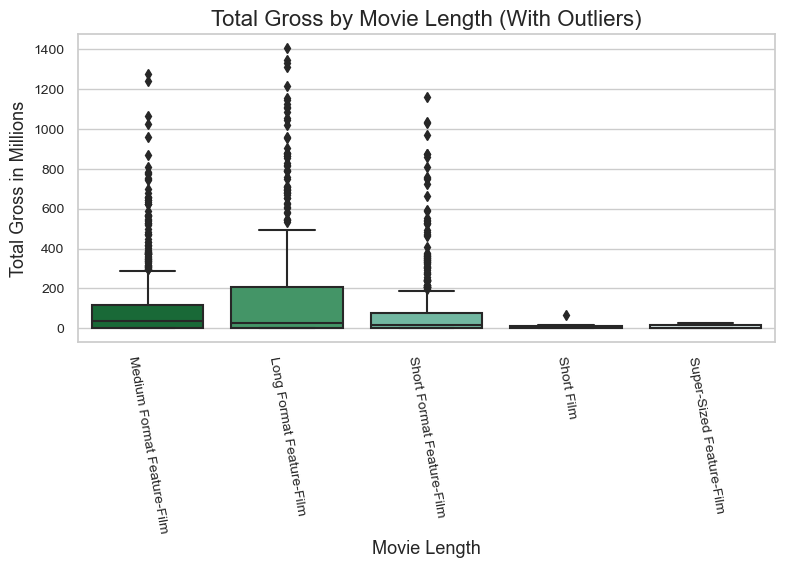

In [55]:
# Generating box plot of total gross statistics per movie length with outliers

plt.figure(figsize=(9,4))
sns.boxplot(x='movie_length', y='total_gross_mil', data=df_runtime, palette='BuGn_r')
plt.xticks(rotation=-80)
plt.ylabel('Total Gross in Millions', fontsize=13)
plt.xlabel('Movie Length', fontsize = 13)
plt.title('Total Gross by Movie Length (With Outliers)', fontsize = 16)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10);

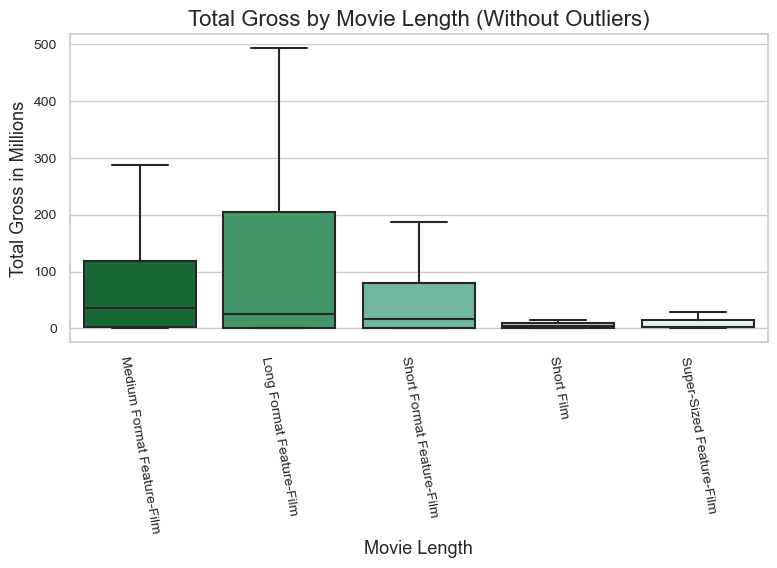

In [56]:
# Generating box plot of total gross statistics per movie length without outliers

plt.figure(figsize=(9,4))
sns.boxplot(x='movie_length', y='total_gross_mil', data=df_runtime, showfliers=False, palette='BuGn_r')
plt.xticks(rotation=-80)
plt.ylabel('Total Gross in Millions', fontsize=13)
plt.xlabel('Movie Length', fontsize = 13)
plt.title('Total Gross by Movie Length (Without Outliers)', fontsize = 16)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10);

Based on the mean, the long-format feature films, that last between 125 min and 180 min, appear to have the highest total gross. 
It indicates the long format has a higher potential for box office success. It also has the largest interquartile range (IQR), meaning that the middle values of the total gross are the most spread out. It suggests that the box office revenue could vary. On the other hand, it has a very clear right-skewed distribution with a long right whisker.
This right-skewed distribution tells us that more movies fall into the higher side of the mean.

Note that, we're only looking at the gross total values in this study. We can assume that longer movies have higher production costs than shorter ones.
To understand the business performance of these movies, we need to do another study that includes the return on investment figure (Net Revenue/Production Cost).

### Average Rating

In [57]:
# The third and final variable I'm exploring is the average rating.
# I will start creating a copy of master DataFrame for this use.
df_rating = df_master.copy()
df_rating.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3428 entries, 0 to 3427
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   title            3428 non-null   object 
 1   release_year     3428 non-null   int64  
 2   average_rating   1918 non-null   float64
 3   runtime_minutes  1934 non-null   float64
 4   genres           1942 non-null   object 
 5   studio           3423 non-null   object 
 6   total_gross_mil  3428 non-null   float64
 7   domestic_gross   3428 non-null   object 
 8   foreign_gross    3428 non-null   object 
 9   total_gross      3428 non-null   object 
dtypes: float64(3), int64(1), object(6)
memory usage: 294.6+ KB


In [58]:
# 44.05% of the entries have null values for the average rating.
df_rating = df_rating.dropna(axis=0, subset=['average_rating'])

In [59]:
# Let's check the DataFrame again.
df_rating.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1918 entries, 0 to 3427
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   title            1918 non-null   object 
 1   release_year     1918 non-null   int64  
 2   average_rating   1918 non-null   float64
 3   runtime_minutes  1914 non-null   float64
 4   genres           1916 non-null   object 
 5   studio           1916 non-null   object 
 6   total_gross_mil  1918 non-null   float64
 7   domestic_gross   1918 non-null   object 
 8   foreign_gross    1918 non-null   object 
 9   total_gross      1918 non-null   object 
dtypes: float64(3), int64(1), object(6)
memory usage: 164.8+ KB


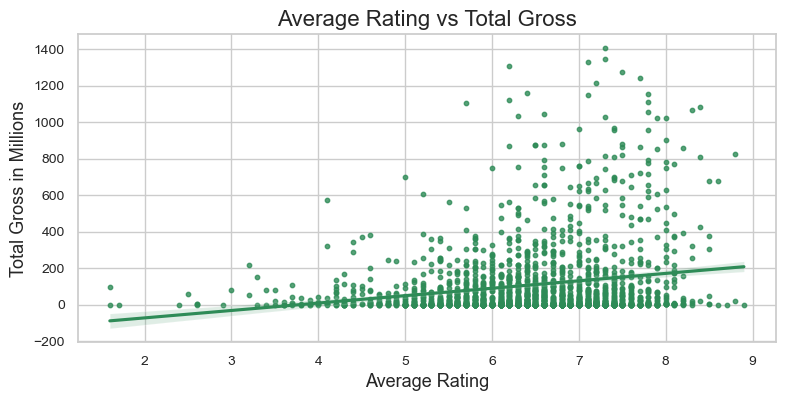

In [60]:
# I want to start exploring if there's any correlation between the total gross and average rating variables

plt.figure(figsize=(9,4))
sns.regplot(x="average_rating", y="total_gross_mil", data=df_rating, scatter_kws={'s':10}, color='seagreen')
plt.ylabel('Total Gross in Millions', fontsize=13)
plt.xlabel('Average Rating', fontsize = 13)
plt.title('Average Rating vs Total Gross', fontsize = 16)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10);

In [61]:
x = df_rating['average_rating']
y = df_rating['total_gross_mil']
r = np.corrcoef(x,y)
r[1, 0]

0.2044654394505126

Based on the Pearson correlation coefficient (r), there is a weak positive correlation between the average rating and the total gross figure. The association between them is negligible.

It is interesting to see that the higher rating movies do not necessarily records higher gross figures.

Before moving forward, I'm curious to see if we'll find any strong correlation between the long-format feature films and the average rating.

In [62]:
df_long_format = df_runtime.copy()
df_long_format = df_long_format.loc[df_long_format['movie_length'] == 'Long Format Feature-Film']
x = df_long_format['average_rating']
y = df_long_format['total_gross_mil']
r = np.corrcoef(x,y)
r[1, 0]

0.28862133606254736

There is a weak positive correlation between long-format movies and average ratings. It still means that the higher rating movies do not necessarily generate higher gross figures.

Because we couldn't find any significant correlation between these two variables, I will categorise the ratings and explore their categorical statistics.

In [63]:
# Definning a new series to categorise the average ratings.
# The average IMDb score is approximately a 6.4
# Anything lower than or equal to 6 will be categorised as low.
# Anything greater than or equal to 8 will be categorised as high.
# Everything in between will be medium.
df_rating["rating_type"] = df_rating["average_rating"].map(lambda x: "High" if x >= 8 else ("Low" if x <= 6 else "Medium"))
df_rating["rating_type"].value_counts().to_frame()

,rating_type
Medium,1248
Low,591
High,79


In [64]:
# The majority of the movies fall into the "medium rating".
# Getting mean and median of the total gross by the rating type.
genre_stats_3 = df_rating.groupby('rating_type')['total_gross_mil'].agg(['median', 'mean'])
genre_stats_3.sort_values(by='mean', ascending=False)

,median,mean
rating_type,,
High,98.30,238.92
Medium,29.30,119.66
Low,16.90,62.91


In [65]:
# Getting Q1 (25th percentile) for total gross of each rating type
e = df_rating.groupby('rating_type')['total_gross_mil'].quantile(0.25)
# Getting Q3 (75th percentile) for total gross of each rating type
f = df_rating.groupby('rating_type')['total_gross_mil'].quantile(0.75)
# Getting interquartile range (IQR) for total gross of each rating type
iqr_3 = f - e
iqr_3.sort_values(ascending=False)

rating_type
High     373.90
Medium   125.58
Low       78.12
Name: total_gross_mil, dtype: float64

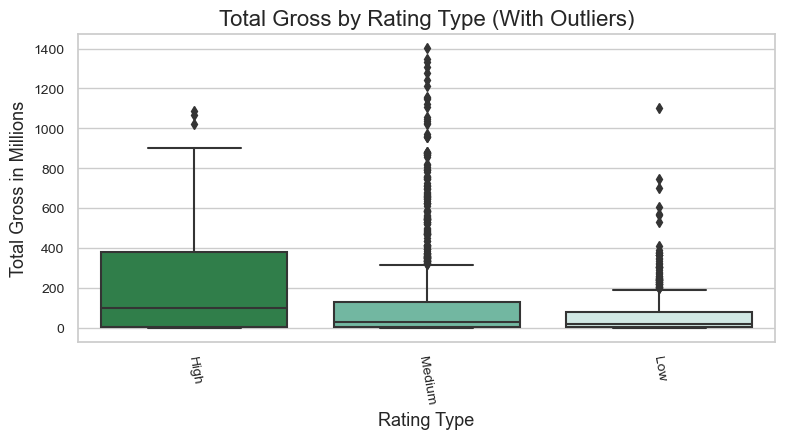

In [66]:
# Generating box plot of total gross statistics per rating type with outliers

plt.figure(figsize=(9,4))
sns.boxplot(x='rating_type', y='total_gross_mil', data=df_rating, palette='BuGn_r')
plt.xticks(rotation=-80)
plt.ylabel('Total Gross in Millions', fontsize=13)
plt.xlabel('Rating Type', fontsize = 13)
plt.title('Total Gross by Rating Type (With Outliers)', fontsize = 16)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10);

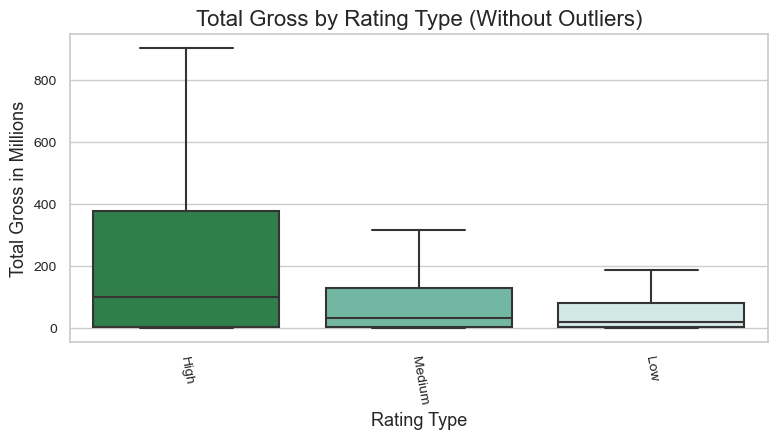

In [67]:
# Generating box plot of total gross statistics per rating type without outliers

plt.figure(figsize=(9,4))
sns.boxplot(x='rating_type', y='total_gross_mil', data=df_rating,showfliers=False, palette='BuGn_r')
plt.xticks(rotation=-80)
plt.ylabel('Total Gross in Millions', fontsize=13)
plt.xlabel('Rating Type', fontsize = 13)
plt.title('Total Gross by Rating Type (Without Outliers)', fontsize = 16)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10);

Based on mean and median, the high rating movies, that have a rating higher than or equal to 8, appear to have the highest total gross. It indicates the higher-rating movies have a higher potential for box office success. Even though the high rating movies also have the largest interquartile range (IQR), their distribution is right-skewed. The right-skewed distribution tells us that movies that fall into the higher side of the mean, which is a positive indication.

## Evaluation

My findings have shown a direction of what should be investigated even further. They provide a baseline of more in depth analysis work. The value they bring lie with understanding the main datasets and exploring their relations to the worldwide movie gross. 

## Conclusions

The insights of I derived from the study are:

* Microsoft should invest in Sci-Fi, Animation, or Adventure genres.
* The long-format movies that have a runtime of 125-180 minutes have higher box office success. However, when the runtime goes beyond 180 minutes, the total gross starts to decline. Therefore, Microsoft should produce a movie in a long format but shouldn't exceed 180 minutes mark.
* There is no significant correlation between average movie ratings and box office revenue. Being said that, I observed the higher rating movies tend to perform well at the box office. The recommended action here is not to focus on the ratings purely and use the high-rating movies as a benchmark purely.

In this study, I worked with constraints. The most important constraint was the delivery time of the analysis results. To derive some actionable insights, I had to limit the data I worked with and only selected three datasets. However, it became clear that more data was needed to explore the business problem. 

Moving forward, I highly recommend considering the followings:

* The production cost and the return on investment should be part of the following studies. We know the total gross but we don't know the cost of making a high-gross movie and how profitable it could be.
* I explored the genres separately but it would provide great value if the combination of these genres are explored as well.
* There is more variable that wasn't a part of this study but could potentially give actionable insights such as release dates, creative types, and production methods.
* Finally, this study only consists of movies released between 2010 and 2018. It doesn't answer how the most recent movies performed and if the global pandemic affected the overall trends. There is value to explore these questions in a separate study before making decisions.